<a href="https://colab.research.google.com/github/edso2103/Cuadernos/blob/main/Especies_de_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> Machine Learning en Computación Avanzada
<br>
<i><b>Estudiante:</b></i> Edna Sofía Orjuela Puentes
<br>
<i><b>Tema:</b></i> Clasificación de especies iris
<br>
<br>
23/03/21
<br>
</FONT>
</div>

<br><br><FONT FACE="times new roman" SIZE=4>
**Objetivo**

Crear una sencilla aplicación de ML, la cual permita distinguir en algunas flores la longitud y la anchura de los sépalos. Adicionalmente, se tiene categorías como setosa, versicolour o virginica. A traves de las medida se tenga una idea a que especie pertenerce cada iris

In [ ]:
import numpy as np  
from sklearn.datasets import load_iris
irisDataset = load_iris()

In [ ]:
irisDataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
#DESCR de la clave presenta información descriptiva completa del dataset
print(irisDataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
#Imprimir los nombres de las clases de flores
print("Clases de flores <target_names>:\n{}".format(irisDataset['target_names']))

Clases de flores <target_names>:
['setosa' 'versicolor' 'virginica']


In [ ]:
#Imprimir los nombres de las características <feature_names> del dataset
print("Nombre de características <feature_names>:\n{}".format(irisDataset['feature_names']))

Nombre de características <feature_names>:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
#El data set contiene los campos:'data'. El campo 'data tiene las medidas numéricas
#de ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

print("Tipo de dato <'data'>:\n{}".format(type(irisDataset['data'])))


Tipo de dato <'data'>:
<class 'numpy.ndarray'>


In [ ]:
#Las filas del dataset corresponden a las flores, mientras que las columnas representn las 
#medidas para cada una de las flores
#como es la dimensión del dataset

print("Dimensión del array <data> : {}".format(irisDataset['data'].shape))
#150 filas o atributos y 4 columnas o medidas de las flores

Dimensión del array <data> : (150, 4)


In [ ]:
#Se presentan las 5 primeras observaciones del 'data'
print("Cinco primeras observaciones del 'data': \n\n\n{}".format(irisDataset['data'][:5]))

Cinco primeras observaciones del 'data': 


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
#El data set contiene los campos:'target'. El campo 'data tiene las medidas numéricas
#de ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

print("Tipo de dato <'target'>:\n{}".format(type(irisDataset['target'])))

Tipo de dato <'target'>:
<class 'numpy.ndarray'>


In [ ]:
#Dimensión del 'target'
print("Dimensión del 'target' iris: {}".format(irisDataset['target'].shape))

Dimensión del 'target' iris: (150,)


In [ ]:
#Del anterior, se presenta que 'target es un array de 1D <una entrada por flor>
#Se presenta el contenido de target
print("Contenido del array <target>: \n\n\n{}".format(irisDataset['target']))

Contenido del array <target>: 


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<FONT FACE="times new roman" SIZE=4>
Los números anteriores representan que el array  irisDataset ['target']


*   0 => Iris-Setosa
*   1 => Iris-Versicolour
*   2 => Iris-Virginica




In [ ]:
#Primero se dividen los datos en entrenamiento y de prueba <train, test>
#Para ello se hará uso de sklearn: train_test_split
#El train_test_split se divide en 2 grupos: Pruebas y Entrenamiento <x,y>
#La división se hará para entrenar en relación a un pocentaje (default=25% de los datos que usará para la prueba)
#set_size=0.3 para modificar el porcentaje para entrenar 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(irisDataset['data'],
                                               irisDataset['target'],
                                               random_state=0)

In [ ]:
#Se imprime la dimensiones de los grupos divididos de entrenamiento
print("X train dimensión:{}".format(X_train.shape))
print("Y train dimensión:{}".format(y_train.shape))

X train dimensión:(112, 4)
Y train dimensión:(112,)


In [ ]:
#Se imprime la dimensiones de los grupos divididos de prueba (25%)
print("X train dimensión:{}".format(X_test.shape))
print("Y train dimensión:{}".format(y_test.shape))

X train dimensión:(38, 4)
Y train dimensión:(38,)


<FONT FACE="times new roman" SIZE=4>**Visualización de los datos:**
 
Se desea inspeccionar los datos de forma gráfica, para revisión ocular sore anomalías o peculiaridades que se pueden encontrar en los datos.


*   Se lleva el dataset a un dataframe usando pandas, para representar mejor la visualización.



In [ ]:
import pandas as pd
irisDataframe=pd.DataFrame(X_train,columns=irisDataset.feature_names)
irisDataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


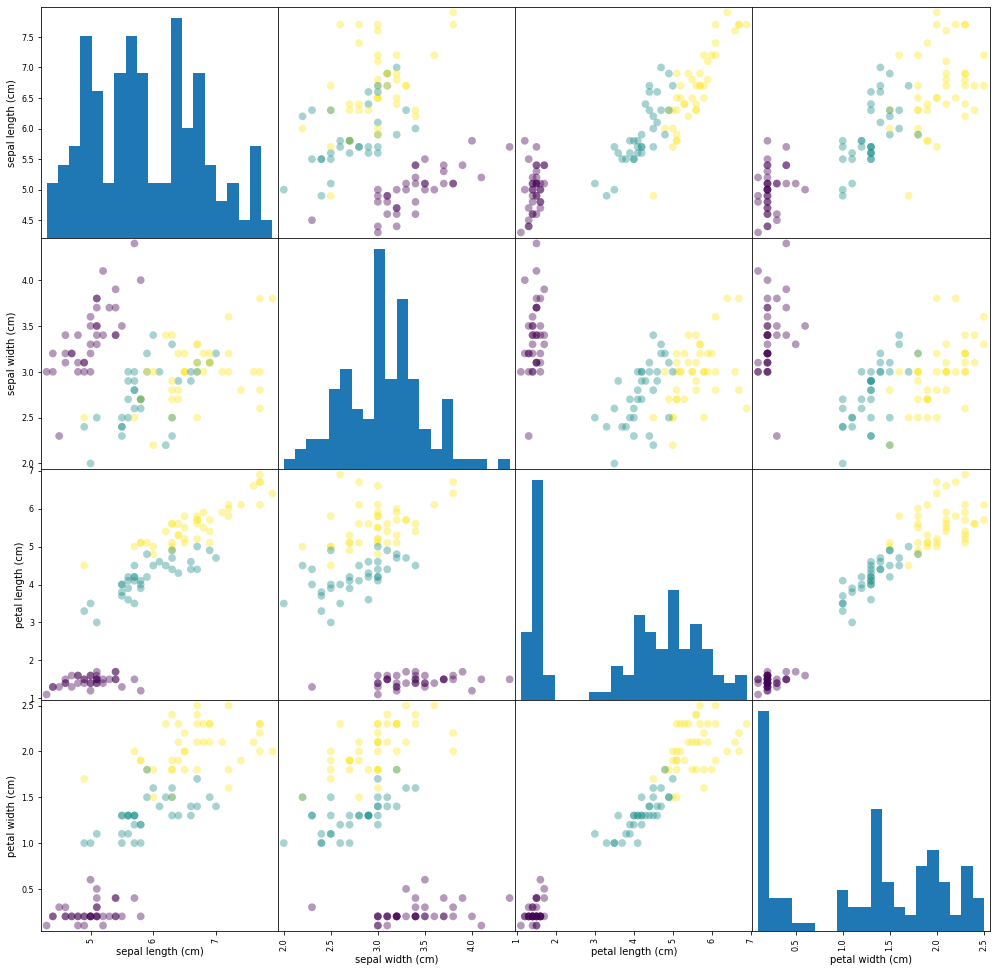

In [ ]:
#Se crea una matriz de dispersión con pandas para y_train (con colores según y_train)
#dataframe, color, tamaño, marcas, histogramas,tamaño de las marcas,transparencia
trainMatriz=pd.plotting.scatter_matrix(irisDataframe,c=y_train,figsize=(17,17),marker='o',
                                       hist_kwds={'bins':20},s=60,alpha=0.4)
#Amarillo Virginica
#Verde Versicolour
#Morado Setosa

<FONT FACE="times new roman" SIZE=4>**Vecinos más Cercanos:** 

La construcción de este modelo solo consiste en almacenar el conjunto de entrenamiento. Para hacer una predicción para un nuevo punto de datos, el algoritmo encuentra el punto del conjunto de entrenamiento que más se acerca al nuevo punto. 

A continuación se asigna la etiqueta de este punto de entrenamiento al nuevo punto de datos. Los K vecinos más cercanos significa que en lugar de usar solo el vecino más cercano al nuevo punto de datos, podemos considerar cualquier número fijo K de vecinos en el entrenamiento.




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modeloKNN=KNeighborsClassifier(n_neighbors=1)#Número de vecinos, demás parámetros por defecto

<FONT FACE="times new roman" SIZE=4>
El objeto del modeloKNN encapsula el algoritmo que se utilizará para construir el modelo a partir de los datos de entrenamiento, así como el algoritmo para hacer predicciones sobre nuevos puntos de datos. Adicionalmente, contendrá información que el algoritmo ha extraído de los datos de entrenamiento(el clasificador KNN solo almacenará el conjunto de entrenamiento).
Para contruir el modelo sobre el conjunto de entrenamiento, llamamos al método fit del objeto modeloKNN, que toma argumentos como el array numpy X_train y y_train (correspondientes etiquetas de entrenamiento)

In [ ]:
modeloKNN.fit(X_train,y_train)#ajustar el modelo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

<FONT FACE="times new roman" SIZE=4>
El método fit devuelve el propio objeto modeloKNN (y lo modifica en su lugar), por lo que obtenemos una representación del clasificador. La representación nos muestra los parámetros que se utilizaron para crear el modelo. Casi todos son valores por defecto.
El parámetro que hemos pasado es n_neighbors=1.La mayoría de los parámetros del clasificador son optimizaciones de velocidad o para casos muy específicos

    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

<FONT FACE="times new roman" SIZE=4>**Predicciones:** 

Para las predicciones utilizaremos el modelo sobre nuevos datos para los que podríamos no conocer las etiquetas correctas.¿A qué categoría pertenecen los datos de prueba? (no los de entrenamiento).
Se encontró un iris en la calle con una longitud de sépalo de 5cm, una anchura del sépalo de 2.9 cm, una longitud de pétalo de 1 cm y una anchura de 0.2 cm
¿A qué clase de iris corresponde?
¡Cuidado!=las medidas deben coincidir a las del dataset

In [ ]:
X_nuevos=np.array([[5,2.9,1,0.2]])#Es necesario pasarlo como arreglo bidimensional (segun la observación)
X_nuevos

array([[5. , 2.9, 1. , 0.2]])

In [ ]:
puntoD=np.array([[4.6,3,1,0.2]])
puntoD

array([[4.6, 3. , 1. , 0.2]])


La medidas de esta nueva flor se encuentran en un array bidimensional
debido a que la biblioteca scikitlearn siempre espera un array bidimensional
para los datos

In [ ]:
#Se requiere saber la forma del vector (1 registro, 4 características)
print(X_nuevos.shape)


(1, 4)


In [ ]:
#Para hacer la predicción se llama al método 'predict' en el objeto modeloKNN
prediccion=modeloKNN.predict(X_nuevos)
prediccion
#La predicción corresponde a 0 es decir, setosa

array([0])

In [ ]:
#Impresión de la clase de la predicción
print ("Tipo de iris según la prediccion", irisDataset['target_names'][prediccion])

Tipo de iris según la prediccion ['setosa']


<FONT FACE="times new roman" SIZE=4>**Evaluación del modelo:**  

En esta sección se usará el conjunto de datos de prueba (X_test,Y_test). Estos datos no fueron utilizados para la construcción del modelo, pero no sabemos cual es la especie correcta para cada iris en el conjunto de prueba. Se puede hacer una predicción para que cada iris de los datos de prueba y compararla con su etiqueta (categoría de la flor).
Para medir la eficacia del modelo se calcula la precisión, como fracción de flores para las que se predijo la especie correcta.


In [ ]:
y_predict= modeloKNN.predict(X_test)
print("Predicciones sobre el conjunto de pruebas de etiquetas",y_predict)

Predicciones sobre el conjunto de pruebas de etiquetas [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [ ]:
#Se quiere imprimir los valores reales de las etiquetas
print("Valores reales",y_test)
#Los datos de la predicción concuerdan con los reales a excepción del último número

Valores reales [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [ ]:
puntuacion=np.mean(y_predict==y_test)
puntuacion
#La precisión corresponde al 97% (precisión muy alta)

0.9736842105263158

In [ ]:
#La precisión también se puede obtener desde el modelo
modeloKNN.score(X_test,y_test)

0.9736842105263158

<FONT FACE="times new roman" SIZE=4>Para este modelo la precisión del conjunto de pruebas (X_test,y_test) es de aproximadamente 0.97 lo que significa que la predicción será correca para el 97% de los datos del conjunto de pruebas. Es decir, que se puede esperar que el 'modeloKNN' sea correcto el 97% de las veces para las nuevas flores.
El modelo se presenta con un alto nivel de precisión y por lo tanto suficientemente fiable para utilizarlo. 

<FONT FACE="times new roman" SIZE=4>**Resumen:**  

*   Se implementó un modelo para hacer la predicción de una flor 'IRIS' a partir de un dataset
*   El dataset de sklearn, presenta el el conjunto de mediciones(150) físicas de las flores(iris).
*   El data set tiene una columna que etiqueta cada flor, según su clase (virginica,setosa y versicolour)
*   Se presentó una visualización de los datos, con el propósito de observar las relaciones entre las características dadas por el dataset.
*   La visualización se presento con gráficas de dispersión y gráficas de barras. La primera para observar las relaciones entre las características, y la segunda para observar la distribución de las medidas de cada característica.
*   Para la construcción del modelo, se hace una división de los datos, usando el método split de sklearn.
*   Se divide en dos grupos: Entrenamiento, Prueba
*   El grupo de entrenamiento se elige de manera aleatoria (método split de sklearn) con el 75% de los datos del dataset
*   Se elige el algoritmo de clasificación vecinos más cercanos 
*   Se escoje como único parámetro los vecinos, con valor de 1 (1 vecino)
*   Se implementa el modelo, en la clase KNeighnorsClassifier que contiene el algoritmo que construye el modelo.
*   Construimos el modelo llamando al método fit, pasando los datos de entrenamiento (X_train, y_train).
*   Se evalúa el modelo mediante el método de puntuación (Score), que calcula la precisión del modelo. 
*   El modelo tiene una precisión del 0.97368 es decir un 97.368%. Lo que representa que el modelo es correcto el 97.368% de las veces en el conjunto de pruebas.
*   La precisión del modelo representa una confianza para usar el modelo









